In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('dataset_imputed.csv')

In [90]:
df.describe()

,year,obj,noc,age_range,fn_class,business,support,unknown,area1,area2,area3,area4,area5,area6,area7,area8,area9,area10,area11,area12,area13,area14,area15,area16,area17,area18,area19,length_service,seniority_fn,seniority_job_mnths,white_collar,fn_junior,fn_middle,fn_senior,obj_noc,prev_obj,prev_obj2,prev_obj3,prev_noc,prev_noc2,prev_noc3,change_manager,change_fn_class,change_fn_area,change_bus_supp,change_job,next_change_fn_class,fn_class_years,obj_bad_years,obj_avg_years,obj_good_years,noc_bad_years,noc_avg_years,noc_good_years,is_manager,is_manager_current_year,num_emp_managing,prev_obj_emp_managing,prev_noc_emp_managing,manager_fn_class,manager_prev_obj,manager_prev_noc,gdp_growth_beg,gdp_growth_mid,stock_return_beg,stock_return_mid,roe,num_emp,avg_wage,medical_accident,lost_time_accident,emp_satisfaction,glassdoor
count,282666.000000,68229.000000,69236.000000,282666.000000,62037.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,62863.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,69552.000000,50617.000000,35082.000000,24704.000000,51332.000000,35511.000000,25014.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,216688.000000,282666.000000,57323.000000,57323.000000,57323.000000,57804.000000,57804.000000,57804.000000,282666.000000,282666.000000,17909.000000,13236.000000,13316.000000,69494.000000,53323.000000,53619.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000,282666.000000
mean,2013.451108,3.196910,3.149619,3.801001,18.313410,0.623496,0.138680,0.237825,0.017763,0.002169,0.031405,0.003216,0.013659,0.019695,0.356707,0.016843,0.001525,0.004344,0.108368,0.030644,0.235249,0.011547,0.001422,0.000386,0.050477,0.055316,0.039265,13.371166,44.791992,43.605103,0.219471,0.128625,0.078234,0.012612,3.168917,3.201810,3.202953,3.210614,3.173186,3.186900,3.206364,0.051591,0.017211,0.055387,0.008151,0.111994,0.022452,0.573030,0.048567,1.253842,0.320273,0.107813,1.119490,0.402723,0.117358,0.117358,4.060696,3.190502,3.126297,20.594267,3.324194,3.447584,1.471544,1.535461,0.094260,0.067486,8.644589,26141.305300,75327.728243,2.404925,1.024627,0.752716,3.765163
std,2.294640,0.538154,0.635203,1.238672,2.309089,0.484510,0.345612,0.425752,0.132089,0.046518,0.174409,0.056617,0.116072,0.138949,0.479028,0.128684,0.039019,0.065768,0.310845,0.172351,0.424155,0.106836,0.037685,0.019633,0.218927,0.228597,0.194226,11.347003,56.420363,73.330854,0.413889,0.334785,0.268539,0.111593,0.496233,0.534186,0.538185,0.537738,0.617177,0.608041,0.596326,0.221200,0.130058,0.228734,0.089914,0.315360,0.148147,1.352647,0.259860,1.521242,0.785554,0.399689,1.477871,0.936859,0.321846,0.321846,3.318418,0.406009,0.472252,2.493414,0.546284,0.628050,0.662280,0.661393,0.147383,0.189747,7.605222,3775.224186,10826.892512,1.697099,0.349752,0.020348,0.060047
min,2010.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000,1.000000,0.500000,0.400000,-0.155287,-0.235294,1.110000,16785.000000,48830.740700,0.770000,0.750000,0.720000,3.667000
25%,2011.000000,3.000000,3.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [4]:
#Imputing the missing values with the mean value in additionally created columns, for statistical and modelling purpose.
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(df.loc[:, 'prev_obj_emp_managing':'manager_prev_noc'])
df.loc[:, 'prev_obj_emp_managing':'manager_prev_noc'] = imputer.transform(df.loc[:, 'prev_obj_emp_managing':'manager_prev_noc'])

C:\Python27\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
#Specifying the numerical features
numerical_features = ['obj', 'noc', 'age_range', 'fn_class', 'length_service', 'seniority_fn', 'seniority_job_mnths', 
       'obj_noc', 'prev_obj', 'prev_obj2', 'prev_obj3', 'next_obj', 'prev_noc', 'prev_noc2', 'prev_noc3', 'next_noc', 
       'fn_class_years', 'obj_bad_years', 'obj_avg_years', 'obj_good_years', 'noc_bad_years', 'noc_avg_years', 'noc_good_years', 
       'num_emp_managing', 'obj_emp_managing', 'noc_emp_managing', 'prev_obj_emp_managing', 'prev_noc_emp_managing', 
       'manager_fn_class', 'manager_prev_obj', 'manager_prev_noc', 
       'gdp_growth_beg', 'gdp_growth_mid', 'stock_return_beg', 'stock_return_mid', 'roe',
       'num_emp', 'avg_wage', 'medical_accident', 'lost_time_accident', 'emp_satisfaction', 'glassdoor']

#Check the skewness of numerical features. Display features with |skew| > 2
skew = df[numerical_features].skew()
skew[(skew>2) | (skew<-2)]

seniority_fn             3.129746
seniority_job_mnths      3.279990
fn_class_years           2.856906
obj_bad_years            7.343286
obj_good_years           3.760389
noc_bad_years            5.196935
noc_good_years           3.397712
num_emp_managing         7.481042
prev_obj_emp_managing    2.276262
dtype: float64

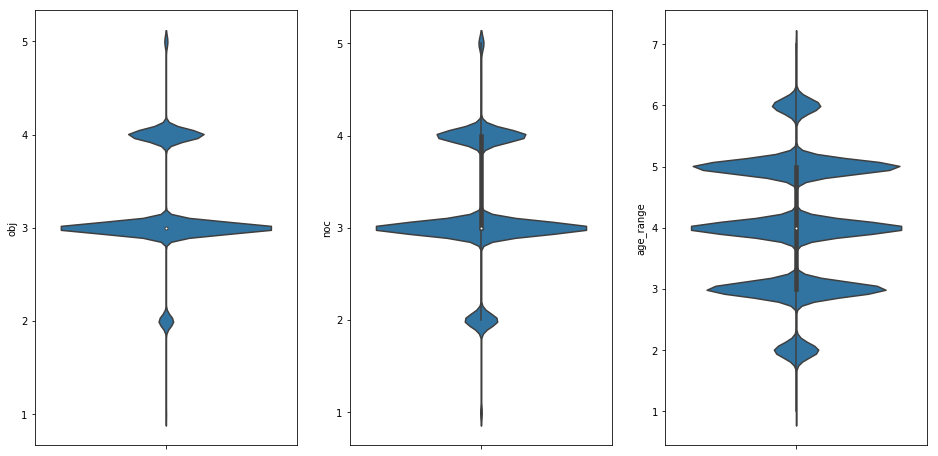

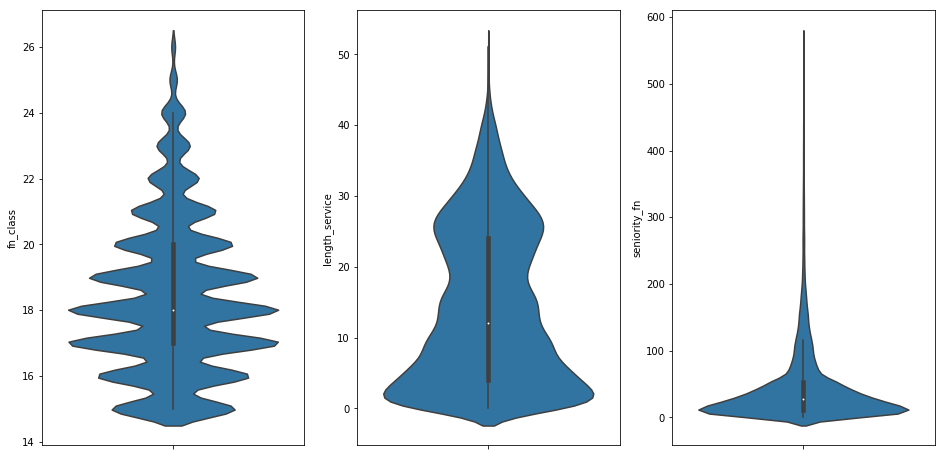

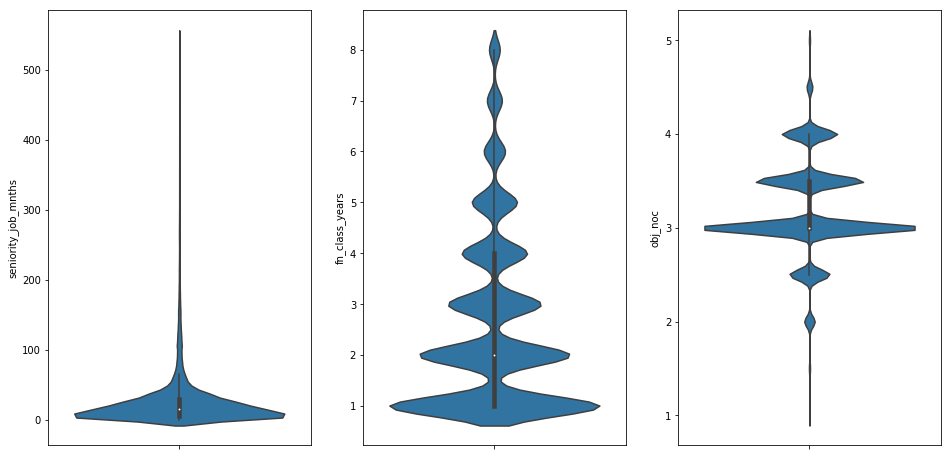

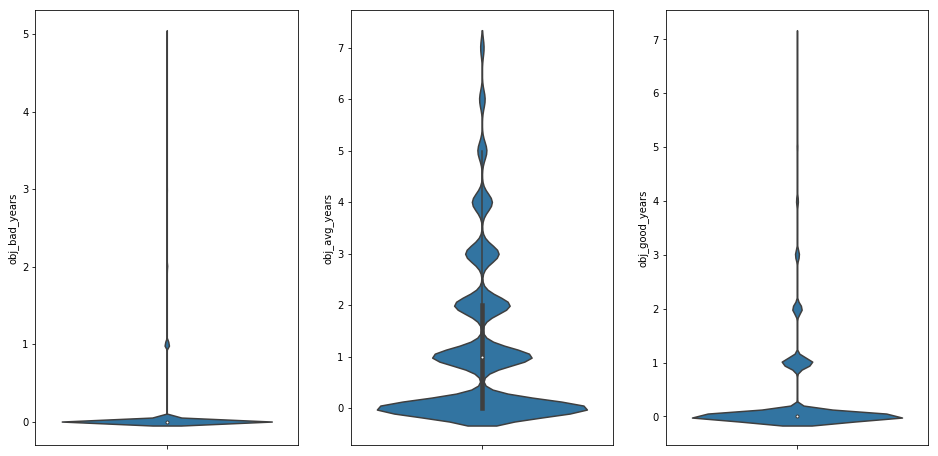

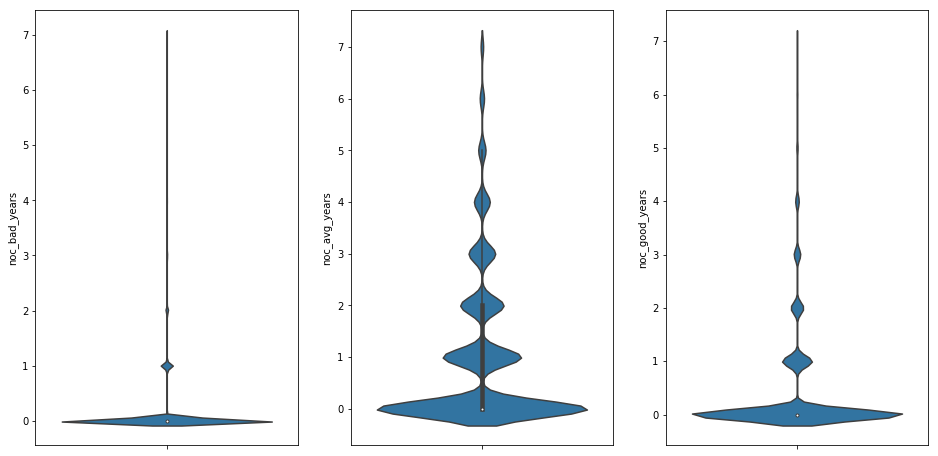

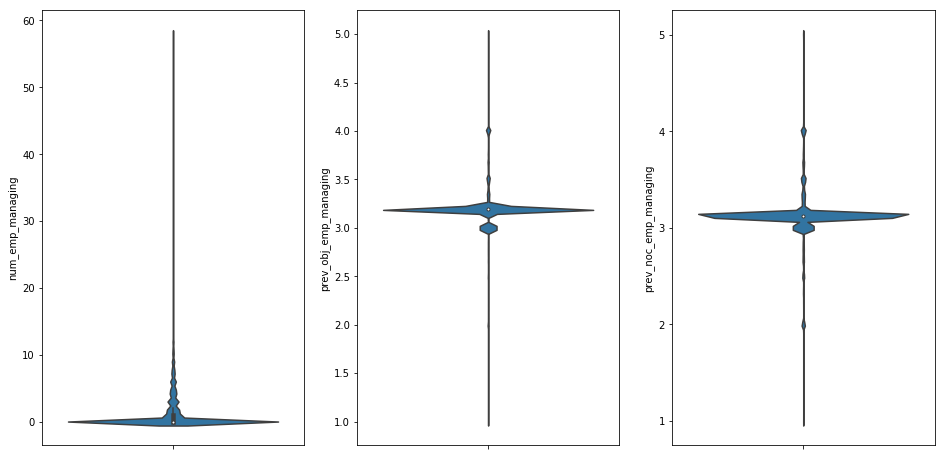

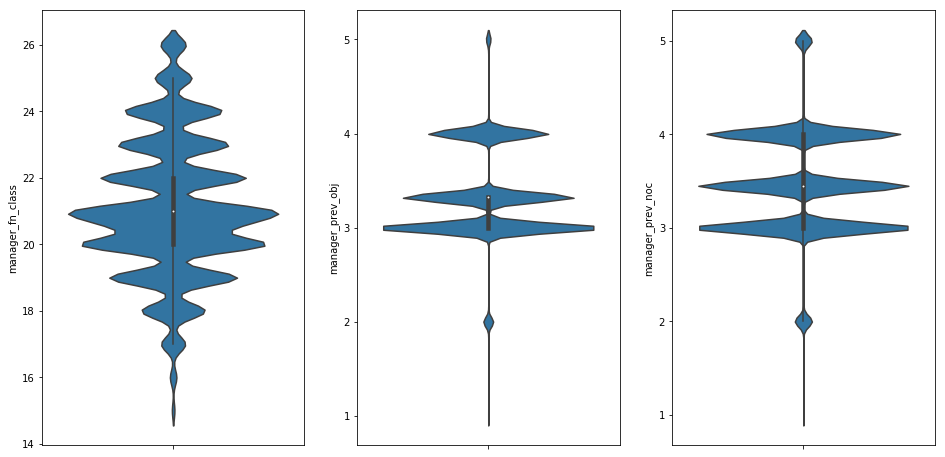

In [6]:
#Plot the distribution on some features
cols = ['obj', 'noc', 'age_range', 'fn_class', 'length_service', 'seniority_fn', 'seniority_job_mnths', 'fn_class_years', 'obj_noc', 
        'obj_bad_years', 'obj_avg_years', 'obj_good_years', 'noc_bad_years', 'noc_avg_years', 'noc_good_years', 
        'num_emp_managing', 'prev_obj_emp_managing', 'prev_noc_emp_managing', 
        'manager_fn_class', 'manager_prev_obj', 'manager_prev_noc'] 

#Plot violin in a 7x3 grid
n_cols = 3
n_rows = 7

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(16, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=df[df['fn_class'].notnull()], ax=ax[j])

In [7]:
#We notice that there are some extreme outliers in certain columns such as seniority_fn or seniority_job_mnths.
    #Some people stay in the same job for more than 40 years old.
    #Our coach recommended to drop those observations, however we feel that they are still valuable observations,
    #therefore we chose to apply log transformation instead.
to_be_log_transformed = ['seniority_fn', 'seniority_job_mnths', 'num_emp_managing']

for i in range(3):
    df[to_be_log_transformed[i]] = np.log1p(df[to_be_log_transformed[i]])

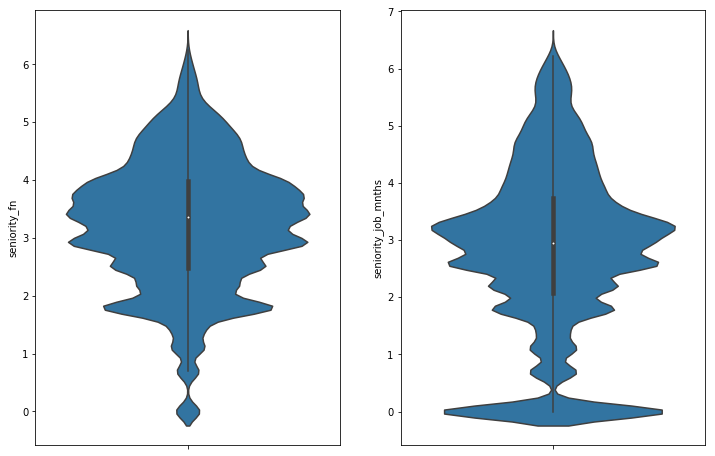

In [27]:
#After transformation, seniority_fn and seniority_job_mnths improved a lot.
fg,ax = plt.subplots(nrows=1,ncols=2,figsize=(12, 8))
sns.violinplot(y=df[df['seniority_fn'].notnull()]['seniority_fn'], data=df[df['fn_class'].notnull()], ax=ax[0])
sns.violinplot(y=df[df['seniority_job_mnths'].notnull()]['seniority_job_mnths'], data=df[df['fn_class'].notnull()], ax=ax[1])

In [8]:
#Correlation analysis
df_corr = df[cols]

#Calculates pearson co-efficient for all combinations
data_corr = df_corr.corr()

#Set the threshold to select only highly correlated attributes
threshold = 0.4

#List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,len(cols)): #for 'size' features
    for j in range(i+1,len(cols)): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))


noc and obj_noc = 0.87
obj and obj_noc = 0.80
seniority_fn and fn_class_years = 0.67
fn_class and manager_fn_class = 0.67
age_range and length_service = 0.64
seniority_fn and seniority_job_mnths = 0.60
obj_avg_years and noc_avg_years = 0.54
fn_class and num_emp_managing = 0.48
fn_class_years and obj_avg_years = 0.44
age_range and fn_class = 0.42
fn_class_years and noc_avg_years = 0.42
obj_good_years and noc_good_years = 0.41


In [7]:
#Export the file for modelling before we do further analysis
df.to_csv('dataset_modelling.csv', index=False)

#### Exploring promotion in different departments (fn_area)

In [16]:
#Calculate the percentage of promoted employee per department in each year
pct_promoted = df[df['fn_class'].notnull()].groupby(['year', 'fn_area']).apply(lambda x: x['change_fn_class'].sum()/len(x))

pct_promoted = pct_promoted.to_frame()

#Only consider observations with a fn_class
pct_promoted['Number of employees'] = df[df['fn_class'].notnull()].groupby(['year', 'fn_area']).change_fn_class.count()

pct_promoted.reset_index(level=0, inplace=True)
pct_promoted.reset_index(level=0, inplace=True)

pct_promoted.columns = ['fn_area', 'year', 'Percentage Promoted', 'Number of employees']


In [17]:
#For example, here is the comparison in 2017 between departments
pct_promoted[pct_promoted['year']==2017]

,fn_area,year,Percentage Promoted,Number of employees
116,COMMERCIAL,2017,0.000000,1
117,COMMUNICATION,2017,0.043956,91
118,FINANCE,2017,0.112713,763
119,GENERAL MANAGEMENT,2017,0.084112,107
120,HUMAN RESOURCES,2017,0.124706,425
121,INDUSTRIAL,2017,0.095252,3412
122,INFORMATION & KNOWLEDGE,2017,0.082243,535
123,INTELLECTUAL ASSETS,2017,0.125000,80
124,LEGAL & COMPLIANCE,2017,0.137931,87
125,MARKETING AND SALES,2017,0.110188,1806


In [19]:
#Export the file to excel
pct_promoted.to_csv('pct_promoted.csv')

#### Design a holistic performance ranking system

In [4]:
#We create a custom ranking system that produce a single score for each employee's performance during a year.
    #Theere are 8 criteria, which we developed by consulting the results from the modelling analysis.
man_emp = df[df['is_manager'] == 1]

mapper = df.groupby(by=['manager_id', 'year'])['obj_noc'].mean().to_dict()
df['obj_noc_emp_managing'] = df.set_index(['employee_id', 'year']).index.map(mapper.get)

In [5]:
avg_months_until_promotion = df[df['next_change_fn_class'] == 1]['seniority_fn'].mean()

In [6]:
#See Appendix <Custom Ranking System.pdf> for a detail description of the criteria
df['crit1'] = df['obj']-1
df['crit2'] = df['noc']-1
df['crit3'] = np.where((df['obj'] > 3) & (df['obj_good_years'] > 0), np.minimum(df['obj_good_years'], 2), 0)
df['crit4'] = np.where((df['noc'] > 3) & (df['noc_good_years'] > 0), np.minimum(df['noc_good_years'], 2), 0)
df['crit5'] = np.where((df['next_change_fn_class'] == 1), 1, 0)
df['crit6'] = np.where((df['next_change_fn_class'] == 1) & (df['seniority_fn'] < avg_months_until_promotion), 1, 0)
df['crit7'] = np.where((df['change_job'] == 1) & (df['obj_noc'] > 3), 1, 0)
df['crit8'] = np.where((df['obj_noc_emp_managing'] > 3), np.ceil(df['obj_noc_emp_managing'])-3, 0)

df['score'] = df.loc[:, 'crit1':'crit8'].sum(axis=1)

In [7]:
#The top performances are defined as those having a score > 10
    #The bottom performance are those having a score < 3
top_performance = df[df['score']>10].sort_values(by='score', ascending=False)

top_performer = top_performance[~top_performance.duplicated(subset=['employee_id'], keep='first')]

bottom_performance = df[(df['score']<3) & (df['obj'].notnull()) & (df['noc'].notnull()) & (df['fn_class'].notnull())].sort_values(by='score')

bottom_performer = bottom_performance[~bottom_performance.duplicated(subset=['employee_id'], keep='first')]

In [39]:
top_performer.to_excel('top_500_performers.xls', index=False)

In [40]:
top_performance.to_excel('top_500_performances.xls', index=False)

In [8]:
bottom_performer.to_excel('bottom_500_performers.xls', index=False)

In [9]:
bottom_performance.to_excel('bottom_500_performances.xls', index=False)

In [49]:
top_performer

,employee_id,manager_id,year,obj,noc,age_range,fn_class,bus_supp,business,support,unknown,fn_area,fn_area_code,area1,area2,area3,area4,area5,area6,area7,area8,area9,area10,area11,area12,area13,area14,area15,area16,area17,area18,area19,job_id,length_service,seniority_fn,seniority_job_mnths,white_collar,fn_junior,fn_middle,fn_senior,obj_noc,prev_obj,prev_obj2,prev_obj3,next_obj,prev_noc,prev_noc2,prev_noc3,next_noc,change_manager,change_fn_class,change_fn_area,change_bus_supp,change_job,next_change_fn_class,fn_class_years,obj_bad_years,obj_avg_years,obj_good_years,noc_bad_years,noc_avg_years,noc_good_years,is_manager,is_manager_current_year,num_emp_managing,obj_emp_managing,noc_emp_managing,prev_obj_emp_managing,prev_noc_emp_managing,manager_fn_class,manager_prev_obj,manager_prev_noc,gdp_growth_beg,gdp_growth_mid,stock_return_beg,stock_return_mid,roe,num_emp,avg_wage,medical_accident,lost_time_accident,emp_satisfaction,glassdoor,obj_noc_emp_managing,crit1,crit2,crit3,crit4,crit5,crit6,crit7,crit8,score
181624,a44e88aca1a4e8bc9cb4e831e8aa96ef,f98f498e4d87d55cda2ef3790e60945a,2012,4.0,5.0,3.0,17.0,Support,0,1,0,FINANCE,area3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6a766ae4ab475243a6023372fd24c0de,6.0,8.0,8.0,1,1,0,0,4.5,4.0,4.0,NaN,4.0,4.0,5.0,NaN,5.0,1,1,0,0,1,1.0,1,0.0,0.0,2.0,0.0,0.0,2.0,1,1,5.0,4.400000,4.200000,4.000000,4.400000,21.0,4.0,4.0,1.7,1.9,0.156313,-0.159330,4.30,29121,48830.74070,2.90,0.80,0.77,3.750,4.300000,3.0,4.0,2.0,2.0,1,1,1,2.0,16.0
28981,1a0fb639c37f205fe48d116e5a92f1c8,6abeff27b995a1aac8253dcb394ba989,2013,5.0,5.0,4.0,18.0,Business,1,0,0,RESEARCH & INNOVATION,area17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5a6d4d605dca40a7d31ad44edc379cf9,7.0,11.0,11.0,1,1,0,0,5.0,5.0,5.0,4.0,NaN,5.0,5.0,4.0,NaN,0,1,0,0,1,1.0,1,0.0,0.0,3.0,0.0,0.0,3.0,1,1,0.0,NaN,NaN,NaN,NaN,22.0,4.0,4.0,1.9,1.1,0.009012,0.078667,9.80,29103,79098.37474,2.59,0.81,0.72,3.750,NaN,4.0,4.0,2.0,2.0,1,1,1,0.0,15.0
23325,1518d128aa67108c84758da6100ea8cb,d36da9a6b071e7807f74a2cdbff081fc,2015,5.0,5.0,3.0,21.0,Business,1,0,0,HUMAN RESOURCES,area6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8a0d95b9071d431171cf73897c0e2493,4.0,29.0,1.0,1,0,1,0,5.0,4.0,4.0,NaN,4.0,4.0,4.0,NaN,4.0,0,0,0,0,1,1.0,3,0.0,0.0,2.0,0.0,0.0,2.0,1,1,2.0,3.500000,2.500000,3.000000,2.500000,24.0,3.0,4.0,0.5,0.8,0.045056,0.004547,1.11,25909,76807.28704,0.97,0.98,0.75,3.833,3.000000,4.0,4.0,2.0,2.0,1,1,1,0.0,15.0
148092,864069e06bdf91b771d06bd2b646b8c5,7658e85149d779e461c84184d849b705,2012,4.0,5.0,3.0,21.0,Business,1,0,0,FINANCE,area3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0b57dd8832fb8f2b78aa3a8e88164f8b,11.0,6.0,6.0,1,0,1,0,4.5,4.0,4.0,NaN,4.0,4.0,4.0,NaN,4.0,0,1,0,0,1,1.0,1,0.0,0.0,2.0,0.0,0.0,2.0,1,1,4.0,3.500000,3.000000,3.333333,3.000000,25.0,4.0,4.0,1.7,1.9,0.156313,-0.159330,4.30,29121,48830.74070,2.90,0.80,0.77,3.750,3.250000,3.0,4.0,2.0,2.0,1,1,1,1.0,15.0
75092,43570affd3b657e97c8ec1c52bf0e6c6,f9959b6ff1f0557ddba7be75d473d58f,2015,4.0,5.0,3.0,20.0,Business,1,0,0,HUMAN RESOURCES,area6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,284aeab1882f572ca0cb5ce8b21ac58d,10.0,23.0,1.0,1,0,1,0,4.5,5.0,5.0,NaN,3.0,5.0,4.0,NaN,4.0,1,0,0,0,1,1.0,2,0.0,0.0,2.0,0.0,0.0,2.0,1,1,1.0,4.000000,3.000000,3.000000,4.000000,23.0,3.0,4.0,0.5,0.8,0.045056,0.004547,1.11,25909,76807.28704,0.97,0.98,0.75,3.833,3.500000,3.0,4.0,2.0,2.0,1,1,1,1.0,15.0
75027,4347730acc928dab02d7ab65e4750ece,99b40be735828cc0341e479380caafb0,2012,4.0,4.0,4.0,21.0,Business,1,0,0,MANUFACTURING,area11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,9079a6b4eb9b69f990740548dd115e8a,16.0,11.0,11.0,1,0,1,0,4.0,4.0,4.0,NaN,4.0,4.0,4.0,NaN,4.0,0,1,0,0,1,1.0,1,0.0,0.0,2.0,0.0,0.0,2.0,1,1,4.0,3.750000,3.500000,3.750000,3.500000,25.0,3.0,3.0,1.7,1.9,0.156313,-0.159330,4.30,29121,48830.74070,2.90,0.80,0.77,3.750,3.625000,3.0,3.0,2.0,2.0,1,1,1,1.0,14.0
27140,1866be2ace65d719307097fa97c2390b,f94f2c4211a23666e16aea6c9d1f9e88,2016,4.0,4.0,3.0,18.0,Business,1,0,0,MARKETING AND SALES,area12,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1a215285526b969d2276ba601fc87fe1,7.0,12.0,